In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
info_csv = pd.read_csv('../datasets/parsed_dataset.csv')

In [4]:
y = info_csv['malicious']
X = info_csv.drop('malicious', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30)

In [6]:
knn = KNeighborsClassifier(n_neighbors=1)

In [7]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
pred = knn.predict(X_test)

In [9]:
print(confusion_matrix(y_test,pred))

[[ 6688   149]
 [   99 18432]]


In [10]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6837
           1       0.99      0.99      0.99     18531

    accuracy                           0.99     25368
   macro avg       0.99      0.99      0.99     25368
weighted avg       0.99      0.99      0.99     25368



In [11]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

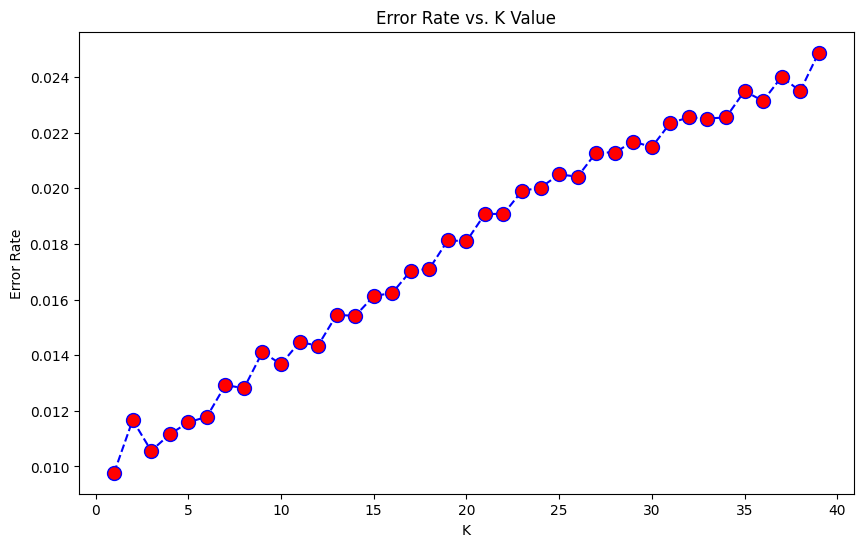

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [13]:
for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)

    print('WITH K={}'.format(i))
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')

WITH K=1


[[ 6688   149]
 [   99 18432]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6837
           1       0.99      0.99      0.99     18531

    accuracy                           0.99     25368
   macro avg       0.99      0.99      0.99     25368
weighted avg       0.99      0.99      0.99     25368



WITH K=2


[[ 6741    96]
 [  200 18331]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6837
           1       0.99      0.99      0.99     18531

    accuracy                           0.99     25368
   macro avg       0.98      0.99      0.99     25368
weighted avg       0.99      0.99      0.99     25368



WITH K=3


[[ 6666   171]
 [   97 18434]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6837
           1       0.99      0.99      0.99     18531

    accuracy                           0.99   

In [15]:
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[ 6421   416]
 [  199 18332]]


              precision    recall  f1-score   support

           0       0.97      0.94      0.95      6837
           1       0.98      0.99      0.98     18531

    accuracy                           0.98     25368
   macro avg       0.97      0.96      0.97     25368
weighted avg       0.98      0.98      0.98     25368

